In [1]:
import nltk
import re
from sklearn.datasets import fetch_20newsgroups

In [2]:
twenty_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
twenty_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [3]:
print(twenty_train.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


## Задание 1

In [4]:
def preprocessing(twenty_train):
    

    for i in range(len(twenty_train.data)):
        lines = twenty_train.data[i].split('\n')
        
        
        #Перевод символов в нижний регистр
        lines = [line.lower() for line in lines]
    
    
        twenty_train.data[i] =  '\n'.join(lines)
        #Удаление символов, не являющихся буквами или цифрами

        updText = ""
        for j in range(len(twenty_train.data[i])):
            sym = twenty_train.data[i][j]
            if not sym.isalnum():
                if updText and updText[-1] != ' ':
                    updText = updText + ' '
            else:
                updText = updText + sym
                
        twenty_train.data[i] =  updText

In [5]:
preprocessing(twenty_train)
preprocessing(twenty_test)

In [6]:
print(twenty_train.data[0])

i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 2 door sports car looked to be from the late 60s early 70s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail 


In [7]:
len(twenty_train.data)

11314

# Задание 2

## 2. CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import cross_validation
from random import randint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/home/pavel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
def CountVectorizerStats(train, test):
    count_vect = CountVectorizer()
    
    CV_train_counts = count_vect.fit_transform(train.data)
    CV_test_counts = count_vect.transform(test.data)
    CV_x_train, CV_x_test, CV_y_train, CV_y_test = cross_validation.train_test_split(CV_train_counts, twenty_train.target, 
                                                            test_size = 0.1, random_state = randint(0, 100))
    svm = SGDClassifier()
    svm.fit(CV_x_train, CV_y_train)
    CV_valid_predicted = svm.predict(CV_x_test)
    print(metrics.classification_report(CV_y_test, CV_valid_predicted,
                                    target_names=test.target_names))
    
    CVpredicted = svm.predict(CV_test_counts)
    return metrics.classification_report(test.target, CVpredicted,
                                    target_names=test.target_names), CVpredicted

## 2. TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

def TfIdfValidation(train, test):
    print(train.data[0])
    idf_vectorizer = TfidfVectorizer()
    
    x_train_counts = idf_vectorizer.fit_transform(train.data)
    x_test_counts = idf_vectorizer.transform(test.data)
    v_x_train, v_x_test, v_y_train, v_y_test = cross_validation.train_test_split(x_train_counts, train.target,  #twenty_train instead train
                                                            test_size = 0.1, random_state = randint(0, 100))
    svm = SGDClassifier()
    svm.fit(v_x_train, v_y_train)
    v_predicted = svm.predict(v_x_test)
    
    print(metrics.classification_report(v_y_test, v_predicted,
                                    target_names=test.target_names))
    

def TfIdf(train, test):
    idf_vectorizer = TfidfVectorizer()
    
    x_train_counts = idf_vectorizer.fit_transform(train.data)
    x_test_counts = idf_vectorizer.transform(test.data)
    
    svm = SGDClassifier()
    svm.fit(x_train_counts, train.target)
    predicted = svm.predict(x_test_counts)
    
    print(metrics.classification_report(test.target, predicted,
                                    target_names=test.target_names))
    return predicted, x_train_counts.shape

## 2. Классификация на валидационной выборке:

### 2. CountVectorizer

In [11]:
CVmetric, CVpredicted = CountVectorizerStats(twenty_train, twenty_test)

                          precision    recall  f1-score   support

             alt.atheism       0.57      0.53      0.55        47
           comp.graphics       0.75      0.17      0.28        69
 comp.os.ms-windows.misc       0.45      0.58      0.51        59
comp.sys.ibm.pc.hardware       0.48      0.46      0.47        61
   comp.sys.mac.hardware       0.50      0.59      0.54        61
          comp.windows.x       0.54      0.69      0.61        45
            misc.forsale       0.47      0.68      0.56        57
               rec.autos       0.68      0.70      0.69        66
         rec.motorcycles       0.61      0.78      0.68        72
      rec.sport.baseball       0.47      0.79      0.59        58
        rec.sport.hockey       0.74      0.85      0.79        67
               sci.crypt       0.52      0.80      0.63        56
         sci.electronics       0.48      0.43      0.45        56
                 sci.med       0.76      0.71      0.74        55
         

### 2. TfIdfVectorizer

In [12]:
TfIdfValidation(twenty_train, twenty_test)

i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 2 door sports car looked to be from the late 60s early 70s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail 
                          precision    recall  f1-score   support

             alt.atheism       0.57      0.58      0.57        43
           comp.graphics       0.85      0.73      0.79        60
 comp.os.ms-windows.misc       0.72      0.77      0.75        71
comp.sys.ibm.pc.hardware       0.72      0.64      0.68        59
   comp.sys.mac.hardware       0.70      0.71      0.70        45
          comp.windows.x       0.80      0.83      0.81        53
            misc.forsale       0.53      0.91      0.67        53
           

#### Как мы видим, преобразование датасета с помощью TfIdfVectorizer дает более качественную классификацию

### 2. Классификация на тестовой выборке:

In [13]:
TFpredicted, shape = TfIdf(twenty_train, twenty_test)

                          precision    recall  f1-score   support

             alt.atheism       0.51      0.46      0.48       319
           comp.graphics       0.67      0.71      0.69       389
 comp.os.ms-windows.misc       0.65      0.61      0.63       394
comp.sys.ibm.pc.hardware       0.68      0.65      0.66       392
   comp.sys.mac.hardware       0.78      0.70      0.73       385
          comp.windows.x       0.80      0.72      0.76       395
            misc.forsale       0.76      0.82      0.79       390
               rec.autos       0.79      0.72      0.75       396
         rec.motorcycles       0.51      0.80      0.62       398
      rec.sport.baseball       0.83      0.81      0.82       397
        rec.sport.hockey       0.88      0.89      0.88       399
               sci.crypt       0.85      0.71      0.78       396
         sci.electronics       0.62      0.56      0.59       393
                 sci.med       0.82      0.76      0.79       396
         

### 2. Примеры текстов, на которых алгоритм ошибается

In [14]:
def printExample(twenty_test, TFpredicted, num):
    topics = twenty_test.target_names.copy()
    print("Predicted topic:", topics[TFpredicted[num]])
    print("Original topic:", topics[twenty_test.target[num]])
    print("TEXT:\n", twenty_test.data[num])
    print()

print("Example №1")
printExample(twenty_test, TFpredicted, 14)
print("Example №2")
printExample(twenty_test, TFpredicted, 15)
print("Example №3")
printExample(twenty_test, TFpredicted, 89)
print("Example №4")
printExample(twenty_test, TFpredicted, 98)
print("Example №5")
printExample(twenty_test, TFpredicted, 164)
print("Example №6")
printExample(twenty_test, TFpredicted, 205)
print("Example №7")
printExample(twenty_test, TFpredicted, 209)
print("Example №8")
printExample(twenty_test, TFpredicted, 219)
print("Example №9")
printExample(twenty_test, TFpredicted, 229)
print("Example №10")
printExample(twenty_test, TFpredicted, 207)
print("Example №11")
printExample(twenty_test, TFpredicted, 233)
print("Example №12")
printExample(twenty_test, TFpredicted, 227)
print("Example №13")
printExample(twenty_test, TFpredicted, 246)
print("Example №14")
printExample(twenty_test, TFpredicted, 254)

Example №1
Predicted topic: soc.religion.christian
Original topic: alt.atheism
TEXT:
 probably because it is rape so nothing it may work for some but not for others it doesn t give any insight into an overall god or overall truth of a religion it would seem to be dependent solely on the individual as well as individually created and since christians have failed to show us how there way of life is in any wy better than ours i do not see why the attempt to try it is necessary or even particularly attractive well we will nerver know for sure if we were told the truth or not but at the very least there is a bit more evidence pointing to the fact that say there was a military conflict in vietnam 25 years ago then there is a supernatural diety who wants us to live a certain way the fact that jesus warned against it means nothing i warn against it too big deal this is not true the first two choices here life and death are scantily documented and the last one is total malarky unless one uses t

#### Анализ: 
Как мы видим, алгоритм может перепутать тексты, как схожие по тематике (примеры 1 - 10), так и абсолютно различные (примеры 11-14), при этом на последних примерах можно заметить, что точность классификации ухудшается при уменьшении размера текста, что, вообще говоря, логично

### 2. Матрица ошибок для TF-IDF:

In [15]:
import itertools
import matplotlib.pyplot as plt
import numpy as np


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

np.set_printoptions(precision=2)

Confusion matrix, without normalization


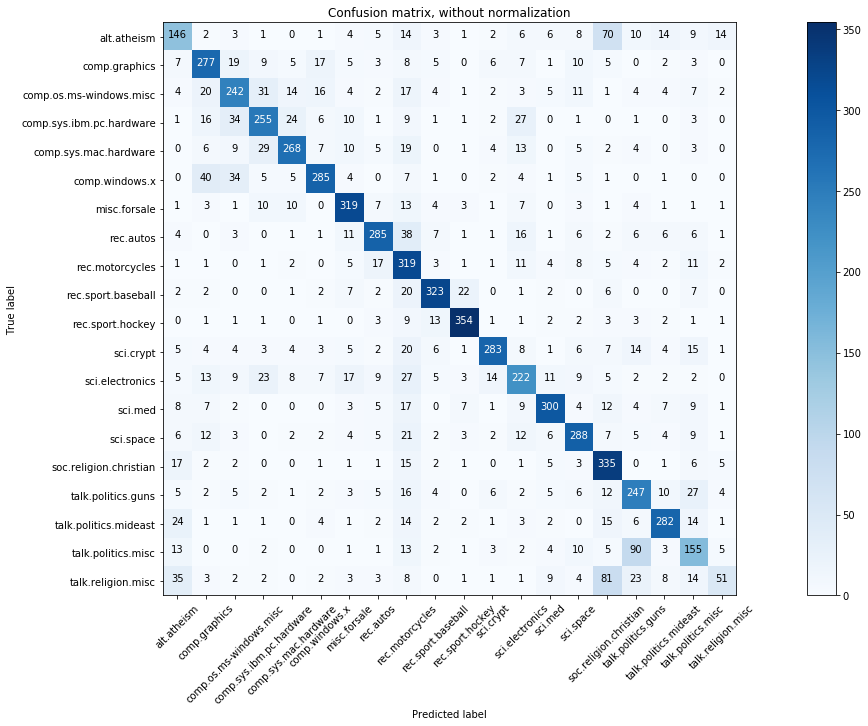

In [16]:
cnf_matrix = metrics.confusion_matrix(twenty_test.target, TFpredicted)
plt.figure(figsize = (20, 10))
plot_confusion_matrix(cnf_matrix, classes=twenty_train.target_names,
                      title='Confusion matrix, without normalization')

plt.show()

#### Анализ:
Как мы видим, больше всего алгоритм допускает ошибок в нечетко-заданных темах (misc).
Например, следующие темы:
(talk.religion.misc, soc.religion.christian), 
(talk.politics.misc, talk.politics.guns), 
(comp.ps.ms-windows.misc, comp.sys.ibm.pc.hardware)

Также достаточно плохо классифицируется misc.forsale

В целом же, алгоритм в основном правльно классифицирует тексты и редко абсолютно неверно угадывает тему текста.

## Задание 3

In [17]:
original_train_texts = twenty_train.data.copy()
original_test_texts = twenty_test.data.copy()

In [18]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
stemming_train_texts = [' '.join([stemmer.stem(word) for word in text.split()]) for text in original_train_texts]
stemming_test_texts = [' '.join([stemmer.stem(word) for word in text.split()]) for text in original_test_texts]

In [19]:
print(twenty_train.data[1])
print()
print(stemming_train_texts[1])

a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk functionality with 800 and 1 4 m floppies are especially requested i will be summarizing in the next two days so please add to the network knowledge base if you have done the clock upgrade and haven t answered this poll thanks 

a fair number of brave soul who upgrad their si clock oscil have share their experi for this poll pleas send a brief messag detail your experi with the procedur top speed attain cpu rate speed add on card and adapt heat sink hour of usag per day floppi disk function with 800 and 1 4 m floppi are especi request i will be summar in the next two day so pleas add to the network knowledg base if you have done the clock upgrad and haven t answer this poll thank


In [20]:
from nltk import wordnet, pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import WordNetLemmatizer
def get_wordnet_pos(treebank_tag):
    my_switch = {
        'J': wordnet.wordnet.ADJ,
        'V': wordnet.wordnet.VERB,
        'N': wordnet.wordnet.NOUN,
        'R': wordnet.wordnet.ADV,
    }
    for key, item in my_switch.items():
        if treebank_tag.startswith(key):
            return item
    return wordnet.wordnet.NOUN

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pavel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/pavel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
def my_lemmatizer(sent):
    lemmatizer = WordNetLemmatizer()
    tokenized_sent = sent.split()
    pos_tagged = [(word, get_wordnet_pos(tag))
                 for word, tag in pos_tag(tokenized_sent)]
    return ' '.join([lemmatizer.lemmatize(word, tag)
                    for word, tag in pos_tagged])

lemmatization_train_texts = [my_lemmatizer(text) for text in original_train_texts]
lemmatization_test_texts = [my_lemmatizer(text) for text in original_test_texts]

In [22]:
print(lemmatization_train_texts[0])
print()
print(twenty_train.data[0])

i be wonder if anyone out there could enlighten me on this car i saw the other day it be a 2 door sport car look to be from the late 60 early 70 it be call a bricklin the door be really small in addition the front bumper be separate from the rest of the body this be all i know if anyone can tellme a model name engine spec year of production where this car be make history or whatever info you have on this funky look car please e mail

i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 2 door sports car looked to be from the late 60s early 70s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail 


In [23]:
def stemming_texts(train, test):
    train.data = [' '.join([stemmer.stem(word) for word in text.split()]) for text in train.data]
    test.data = [' '.join([stemmer.stem(word) for word in text.split()]) for text in test.data]
    
def lemmatization_texts(train, test):
    train.data = [my_lemmatizer(text) for text in train.data]
    test.data = [my_lemmatizer(text) for text in test.data]
    
def original_texts(train, test, origTrain, originTest):
    train.data = origTrain.copy()
    test.data = originTest.copy()

### 3. Классификация без предобработки

In [24]:
prediction, shape = TfIdf(twenty_train, twenty_test)

                          precision    recall  f1-score   support

             alt.atheism       0.54      0.48      0.51       319
           comp.graphics       0.68      0.72      0.70       389
 comp.os.ms-windows.misc       0.66      0.62      0.64       394
comp.sys.ibm.pc.hardware       0.68      0.65      0.66       392
   comp.sys.mac.hardware       0.76      0.71      0.73       385
          comp.windows.x       0.76      0.73      0.74       395
            misc.forsale       0.51      0.84      0.63       390
               rec.autos       0.79      0.71      0.75       396
         rec.motorcycles       0.81      0.77      0.79       398
      rec.sport.baseball       0.87      0.79      0.83       397
        rec.sport.hockey       0.84      0.89      0.87       399
               sci.crypt       0.86      0.71      0.78       396
         sci.electronics       0.63      0.58      0.60       393
                 sci.med       0.77      0.78      0.77       396
         

### 3. Классификация после стемминга:

In [25]:
twenty_train.data = stemming_train_texts.copy()
twenty_test.data = stemming_test_texts.copy()
stemPrediction,stemShape = TfIdf(twenty_train, twenty_test)
twenty_train.data = original_train_texts.copy()
twenty_test.data = original_test_texts.copy()

                          precision    recall  f1-score   support

             alt.atheism       0.55      0.51      0.53       319
           comp.graphics       0.64      0.74      0.69       389
 comp.os.ms-windows.misc       0.63      0.57      0.60       394
comp.sys.ibm.pc.hardware       0.70      0.64      0.67       392
   comp.sys.mac.hardware       0.70      0.73      0.72       385
          comp.windows.x       0.83      0.69      0.75       395
            misc.forsale       0.75      0.82      0.79       390
               rec.autos       0.82      0.70      0.75       396
         rec.motorcycles       0.79      0.74      0.77       398
      rec.sport.baseball       0.55      0.87      0.68       397
        rec.sport.hockey       0.86      0.91      0.89       399
               sci.crypt       0.81      0.73      0.77       396
         sci.electronics       0.58      0.57      0.57       393
                 sci.med       0.82      0.77      0.79       396
         

### 3. Классификация после лемматизации

In [26]:
twenty_train.data = lemmatization_train_texts.copy()
twenty_test.data = lemmatization_test_texts.copy()
lemPrediction, lemShape = TfIdf(twenty_train, twenty_test)

                          precision    recall  f1-score   support

             alt.atheism       0.52      0.48      0.50       319
           comp.graphics       0.71      0.72      0.72       389
 comp.os.ms-windows.misc       0.61      0.59      0.60       394
comp.sys.ibm.pc.hardware       0.67      0.66      0.66       392
   comp.sys.mac.hardware       0.69      0.73      0.71       385
          comp.windows.x       0.80      0.72      0.76       395
            misc.forsale       0.75      0.81      0.77       390
               rec.autos       0.79      0.71      0.75       396
         rec.motorcycles       0.81      0.74      0.77       398
      rec.sport.baseball       0.56      0.84      0.67       397
        rec.sport.hockey       0.84      0.91      0.87       399
               sci.crypt       0.86      0.71      0.78       396
         sci.electronics       0.62      0.55      0.59       393
                 sci.med       0.76      0.80      0.78       396
         

#### Как мы видим, предобработка корпуса не повлияла на точность классификации

### 3. Время работы

In [27]:
import time
def countTime(train, test, experimentsNum):
    ansTime = 0
    idf_vectorizer = TfidfVectorizer()
    for i in range(experimentsNum):
        curTime = time.clock()
    
        x_train_counts = idf_vectorizer.fit_transform(train.data)
        x_test_counts = idf_vectorizer.transform(test.data)
    
        svm = SGDClassifier()
        svm.fit(x_train_counts, train.target)
        predicted = svm.predict(x_test_counts)
        ansTime += time.clock() - curTime
    ansTime = ansTime/experimentsNum
    return ansTime

twenty_train.data = original_train_texts.copy()
twenty_test.data = original_test_texts.copy()
print("Time without сorpus preprocessing:", countTime(twenty_train, twenty_test, 10))

twenty_train.data = stemming_train_texts.copy()
twenty_test.data = stemming_test_texts.copy()
print("Time after stemming:", countTime(twenty_train, twenty_test, 10))

twenty_train.data = lemmatization_train_texts.copy()
twenty_test.data = lemmatization_test_texts.copy()
print("Time after lemmatization:", countTime(twenty_train, twenty_test, 10))
twenty_train.data = original_train_texts.copy()
twenty_test.data = original_test_texts.copy()

Time without сorpus preprocessing: 5.150761700000004
Time after stemming: 4.614668799999999
Time after lemmatization: 4.7499326000000055


### 3. Изменение размерности признакового пространства:

In [28]:
print("Original dimension:", shape[1])
print("Dimension after stemming :", stemShape[1])
print("Dimension after lemmatization:", lemShape[1])

Original dimension: 98706
Dimension after stemming : 81491
Dimension after lemmatization: 90718


# Задание 4

In [29]:
twenty_train.data = original_train_texts.copy()
twenty_test.data = original_test_texts.copy()
print(twenty_train.data[0])

i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 2 door sports car looked to be from the late 60s early 70s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail 


## 4. Удаление самых редких и самых частых слов

In [30]:
import collections
wordCount = {}
for text in original_train_texts:
    for word in text.split():
        if word in wordCount:
            wordCount[word] += 1
        else:
            wordCount[word] = 1

word_counter = collections.Counter(wordCount)
sortedWordCount = word_counter.most_common()
sortedWords = [pair[0] for pair in sortedWordCount]
forbiddenWords = set()

In [31]:
def update_forbidden_words(forbiddenWords,num1, num2):
    forbiddenWords.clear()
    for i in range(num1):
        forbiddenWords.add(sortedWords[i])
    for i in range(num2):
         forbiddenWords.add(sortedWords[len(sortedWords) - i - 1])

In [32]:
def update_texts(train, test, forbiddenWords):
    for i in range(len(train.data)):
        words = train.data[i].split()
        wordNum = 0
        while wordNum < (len(words)):
            if words[wordNum] in forbiddenWords:
                del words[wordNum]
                wordNum -= 1
            wordNum += 1
        train.data[i] = ' '.join(words)
    for i in range(len(test.data)):
        words = test.data[i].split()
        wordNum = 0
        while wordNum < (len(words)):
            if words[wordNum] in forbiddenWords:
                del words[wordNum]
                wordNum -= 1
            wordNum += 1
        test.data[i] = ' '.join(words)

In [33]:
def deleteWordsStats(twenty_train, twenty_test, forbiddenWords):
    original_train_texts = twenty_train.data.copy()
    original_test_texts = twenty_test.data.copy()
    update_texts(twenty_train, twenty_test, forbiddenWords)
    TfIdf(twenty_train, twenty_test)
    twenty_train.data = original_train_texts.copy()
    twenty_test.data = original_test_texts.copy()

## 4. Без предобработки

In [34]:
original_texts(twenty_train, twenty_test, original_train_texts, original_test_texts)
twenty_train.data = original_train_texts.copy()
twenty_test.data = original_test_texts.copy()

In [35]:
deletions = [(0, 0), (0, 10000), (0, 25000), (0, 40000), (0, 55000), (0, 70000), (0, 85000), (0, 90000), (10000, 0), (25000, 0), (40000, 0), (55000, 0), (70000, 0), (85000, 0), (90000, 0), (10000, 10000), (20000, 20000), (30000, 30000), (40000, 40000)]

In [36]:
for el in deletions:
    print("Most frequent words deleted -", el[0])
    print("Least frequent words deleted -", el[1])
    update_forbidden_words(forbiddenWords, el[0], el[1])
    print("RESULTS:")
    deleteWordsStats(twenty_train, twenty_test, forbiddenWords)
    print("Time without сorpus preprocessing:", countTime(twenty_train, twenty_test, 1))
    print()

Most frequent words deleted - 0
Least frequent words deleted - 0
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.51      0.47      0.49       319
           comp.graphics       0.67      0.72      0.69       389
 comp.os.ms-windows.misc       0.61      0.62      0.62       394
comp.sys.ibm.pc.hardware       0.67      0.65      0.66       392
   comp.sys.mac.hardware       0.77      0.69      0.73       385
          comp.windows.x       0.81      0.71      0.76       395
            misc.forsale       0.77      0.81      0.79       390
               rec.autos       0.82      0.70      0.76       396
         rec.motorcycles       0.79      0.79      0.79       398
      rec.sport.baseball       0.55      0.84      0.66       397
        rec.sport.hockey       0.83      0.89      0.86       399
               sci.crypt       0.81      0.73      0.76       396
         sci.electronics       0.64      0.55      0.59       393
 

Time without сorpus preprocessing: 5.463606999999911

Most frequent words deleted - 0
Least frequent words deleted - 85000
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.46      0.48       319
           comp.graphics       0.67      0.70      0.68       389
 comp.os.ms-windows.misc       0.57      0.65      0.61       394
comp.sys.ibm.pc.hardware       0.66      0.60      0.63       392
   comp.sys.mac.hardware       0.75      0.69      0.72       385
          comp.windows.x       0.82      0.68      0.74       395
            misc.forsale       0.75      0.80      0.77       390
               rec.autos       0.80      0.64      0.71       396
         rec.motorcycles       0.73      0.76      0.74       398
      rec.sport.baseball       0.53      0.82      0.64       397
        rec.sport.hockey       0.83      0.89      0.86       399
               sci.crypt       0.75      0.72      0.74       396
         

Time without сorpus preprocessing: 4.757506000000035

Most frequent words deleted - 70000
Least frequent words deleted - 0
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.23      0.06      0.09       319
           comp.graphics       0.40      0.11      0.18       389
 comp.os.ms-windows.misc       0.22      0.06      0.09       394
comp.sys.ibm.pc.hardware       0.37      0.08      0.13       392
   comp.sys.mac.hardware       0.42      0.08      0.13       385
          comp.windows.x       0.47      0.15      0.22       395
            misc.forsale       0.39      0.13      0.19       390
               rec.autos       0.47      0.11      0.18       396
         rec.motorcycles       0.27      0.07      0.11       398
      rec.sport.baseball       0.46      0.11      0.18       397
        rec.sport.hockey       0.60      0.20      0.29       399
               sci.crypt       0.23      0.08      0.12       396
         

Time without сorpus preprocessing: 4.9754760000000715

Most frequent words deleted - 40000
Least frequent words deleted - 40000
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.23      0.08      0.11       319
           comp.graphics       0.44      0.07      0.12       389
 comp.os.ms-windows.misc       0.16      0.04      0.06       394
comp.sys.ibm.pc.hardware       0.27      0.07      0.11       392
   comp.sys.mac.hardware       0.42      0.08      0.14       385
          comp.windows.x       0.53      0.18      0.27       395
            misc.forsale       0.52      0.14      0.22       390
               rec.autos       0.32      0.09      0.14       396
         rec.motorcycles       0.39      0.11      0.17       398
      rec.sport.baseball       0.48      0.13      0.20       397
        rec.sport.hockey       0.45      0.13      0.20       399
               sci.crypt       0.28      0.08      0.13       396
    

## 4. Классификация после стемминга

In [39]:
twenty_train.data = stemming_train_texts.copy()
twenty_test.data = stemming_test_texts.copy()

In [41]:
for el in deletions:
    print("Most frequent words deleted -", el[0])
    print("Least frequent words deleted -", el[1])
    update_forbidden_words(forbiddenWords, el[0], el[1])
    print("RESULTS:")
    deleteWordsStats(twenty_train, twenty_test, forbiddenWords)
    print("Time after stemming:", countTime(twenty_train, twenty_test, 1))
    print()

Most frequent words deleted - 0
Least frequent words deleted - 0
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.56      0.45      0.50       319
           comp.graphics       0.71      0.71      0.71       389
 comp.os.ms-windows.misc       0.65      0.58      0.61       394
comp.sys.ibm.pc.hardware       0.65      0.65      0.65       392
   comp.sys.mac.hardware       0.76      0.70      0.73       385
          comp.windows.x       0.79      0.74      0.76       395
            misc.forsale       0.76      0.82      0.79       390
               rec.autos       0.80      0.71      0.75       396
         rec.motorcycles       0.76      0.76      0.76       398
      rec.sport.baseball       0.55      0.87      0.68       397
        rec.sport.hockey       0.88      0.91      0.89       399
               sci.crypt       0.84      0.72      0.77       396
         sci.electronics       0.62      0.57      0.59       393
 

Time after stemming: 4.663707999999929

Most frequent words deleted - 0
Least frequent words deleted - 85000
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.46      0.49       319
           comp.graphics       0.71      0.66      0.69       389
 comp.os.ms-windows.misc       0.61      0.61      0.61       394
comp.sys.ibm.pc.hardware       0.61      0.65      0.63       392
   comp.sys.mac.hardware       0.70      0.69      0.70       385
          comp.windows.x       0.79      0.71      0.74       395
            misc.forsale       0.74      0.81      0.77       390
               rec.autos       0.79      0.68      0.73       396
         rec.motorcycles       0.76      0.74      0.75       398
      rec.sport.baseball       0.53      0.83      0.65       397
        rec.sport.hockey       0.85      0.89      0.87       399
               sci.crypt       0.81      0.72      0.76       396
         sci.electronic

Time after stemming: 4.099104000000011

Most frequent words deleted - 70000
Least frequent words deleted - 0
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.39      0.26      0.31       319
           comp.graphics       0.44      0.37      0.40       389
 comp.os.ms-windows.misc       0.32      0.22      0.26       394
comp.sys.ibm.pc.hardware       0.38      0.35      0.36       392
   comp.sys.mac.hardware       0.42      0.35      0.39       385
          comp.windows.x       0.46      0.48      0.47       395
            misc.forsale       0.54      0.58      0.56       390
               rec.autos       0.49      0.44      0.46       396
         rec.motorcycles       0.52      0.36      0.43       398
      rec.sport.baseball       0.26      0.61      0.36       397
        rec.sport.hockey       0.68      0.63      0.65       399
               sci.crypt       0.47      0.53      0.50       396
         sci.electronic

Time after stemming: 4.776740000000018

Most frequent words deleted - 40000
Least frequent words deleted - 40000
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.43      0.29      0.34       319
           comp.graphics       0.41      0.46      0.43       389
 comp.os.ms-windows.misc       0.32      0.25      0.28       394
comp.sys.ibm.pc.hardware       0.37      0.34      0.35       392
   comp.sys.mac.hardware       0.38      0.31      0.34       385
          comp.windows.x       0.51      0.48      0.49       395
            misc.forsale       0.49      0.61      0.55       390
               rec.autos       0.46      0.43      0.44       396
         rec.motorcycles       0.53      0.37      0.43       398
      rec.sport.baseball       0.28      0.69      0.40       397
        rec.sport.hockey       0.64      0.60      0.62       399
               sci.crypt       0.50      0.50      0.50       396
         sci.electr

## 4. Классификация после лемматизации

In [57]:
twenty_train.data = lemmatization_train_texts.copy()
twenty_test.data = lemmatization_test_texts.copy()

In [58]:
for el in deletions:
    print("Most frequent words deleted -", el[0])
    print("Least frequent words deleted -", el[1])
    update_forbidden_words(forbiddenWords, el[0], el[1])
    print("RESULTS:")
    deleteWordsStats(twenty_train, twenty_test, forbiddenWords)
    print("Time after lemmatization:", countTime(twenty_train, twenty_test, 1))
    print()

Most frequent words deleted - 0
Least frequent words deleted - 0
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.56      0.48      0.52       319
           comp.graphics       0.70      0.71      0.71       389
 comp.os.ms-windows.misc       0.66      0.54      0.59       394
comp.sys.ibm.pc.hardware       0.64      0.67      0.66       392
   comp.sys.mac.hardware       0.76      0.69      0.72       385
          comp.windows.x       0.79      0.74      0.77       395
            misc.forsale       0.50      0.84      0.63       390
               rec.autos       0.80      0.69      0.74       396
         rec.motorcycles       0.76      0.76      0.76       398
      rec.sport.baseball       0.83      0.82      0.82       397
        rec.sport.hockey       0.87      0.90      0.88       399
               sci.crypt       0.85      0.71      0.77       396
         sci.electronics       0.56      0.61      0.58       393
 

Time after lemmatization: 4.533349999999928

Most frequent words deleted - 0
Least frequent words deleted - 85000
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.45      0.50      0.48       319
           comp.graphics       0.71      0.68      0.69       389
 comp.os.ms-windows.misc       0.60      0.57      0.58       394
comp.sys.ibm.pc.hardware       0.70      0.60      0.65       392
   comp.sys.mac.hardware       0.73      0.71      0.72       385
          comp.windows.x       0.78      0.74      0.76       395
            misc.forsale       0.76      0.79      0.78       390
               rec.autos       0.72      0.70      0.71       396
         rec.motorcycles       0.75      0.72      0.74       398
      rec.sport.baseball       0.53      0.81      0.64       397
        rec.sport.hockey       0.82      0.89      0.85       399
               sci.crypt       0.83      0.71      0.77       396
         sci.elect

Time after lemmatization: 4.470242999999982

Most frequent words deleted - 70000
Least frequent words deleted - 0
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.21      0.08      0.11       319
           comp.graphics       0.46      0.13      0.20       389
 comp.os.ms-windows.misc       0.24      0.06      0.09       394
comp.sys.ibm.pc.hardware       0.32      0.07      0.12       392
   comp.sys.mac.hardware       0.26      0.09      0.14       385
          comp.windows.x       0.49      0.15      0.23       395
            misc.forsale       0.36      0.12      0.18       390
               rec.autos       0.38      0.12      0.18       396
         rec.motorcycles       0.28      0.07      0.12       398
      rec.sport.baseball       0.46      0.14      0.21       397
        rec.sport.hockey       0.60      0.21      0.31       399
               sci.crypt       0.28      0.10      0.15       396
         sci.elect

Time after lemmatization: 4.305761000000075

Most frequent words deleted - 40000
Least frequent words deleted - 40000
RESULTS:
                          precision    recall  f1-score   support

             alt.atheism       0.24      0.09      0.14       319
           comp.graphics       0.06      0.77      0.11       389
 comp.os.ms-windows.misc       0.13      0.04      0.06       394
comp.sys.ibm.pc.hardware       0.29      0.08      0.12       392
   comp.sys.mac.hardware       0.42      0.08      0.13       385
          comp.windows.x       0.41      0.20      0.27       395
            misc.forsale       0.43      0.14      0.21       390
               rec.autos       0.31      0.09      0.14       396
         rec.motorcycles       0.42      0.11      0.18       398
      rec.sport.baseball       0.57      0.16      0.25       397
        rec.sport.hockey       0.50      0.19      0.27       399
               sci.crypt       0.27      0.11      0.15       396
         sci.e

#### Вывод:
1)Без предобработки:
Как мы видим удаление редко встречающихся не влияет на результат классификации, вплоть до удаления 90% слов
В то время, как удаления только 10% самых встречающихся слов уменьшает точность классификации на 20%, удаление большего числа слов очень сильно уменьшает характеристику recall, precision же уменьшается заметно медленее


2)После стемминга:
Как и в случае без предобработки, удаление редко встречающихся слов не меняет точность классификации. Удаление же часто встречающихся слов уменьшает точность классификации не так сильно, как в случае без предобработки, при этом recall и precision уменьшаются одинаково. При удалении 90% слов точность классификации понижается c 0.7 до 0.45

3)После лемматизации:
Почти точно также как и без предобработки

## 4. Удаление стоп-слов

In [60]:
twenty_train.data = original_train_texts.copy()
twenty_test.data = original_test_texts.copy()

In [61]:
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_eng = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/pavel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
def deleteStopWords(twenty_train, twenty_test):
    original_train_texts = twenty_train.data.copy()
    original_test_texts = twenty_test.data.copy()
    twenty_train.data = [' '.join([word for word in text.split() if not word in sw_eng]) for text in twenty_train.data]
    twenty_test.data = [' '.join([word for word in text.split() if not word in sw_eng]) for text in twenty_test.data]
    TfIdf(twenty_train, twenty_test)
    print("Time:", countTime(twenty_train, twenty_test, 5))
    twenty_train.data = original_train_texts.copy()
    twenty_test.data = original_test_texts.copy()

In [63]:
deleteStopWords(twenty_train, twenty_test)

                          precision    recall  f1-score   support

             alt.atheism       0.51      0.46      0.49       319
           comp.graphics       0.68      0.72      0.70       389
 comp.os.ms-windows.misc       0.64      0.61      0.63       394
comp.sys.ibm.pc.hardware       0.66      0.67      0.66       392
   comp.sys.mac.hardware       0.76      0.71      0.74       385
          comp.windows.x       0.79      0.72      0.75       395
            misc.forsale       0.74      0.80      0.77       390
               rec.autos       0.81      0.71      0.76       396
         rec.motorcycles       0.79      0.76      0.77       398
      rec.sport.baseball       0.55      0.84      0.67       397
        rec.sport.hockey       0.83      0.89      0.86       399
               sci.crypt       0.85      0.70      0.77       396
         sci.electronics       0.65      0.56      0.60       393
                 sci.med       0.77      0.79      0.78       396
         

#### Анализ:
Как мы видим, удаление стоп-слов не меняет точность классификации

# Дополнительное задание

In [64]:
twenty_train.data = original_train_texts.copy()
twenty_test.data = original_test_texts.copy()

## Закон Ципфа

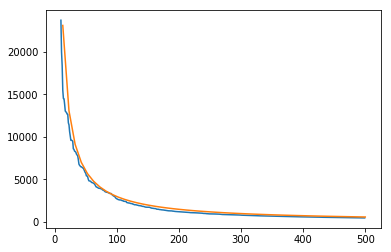

In [65]:
def hyp(x):
    return 300000/x

import pylab as plt
nums = range(len(sortedWords))
sortedFreq = [pair[1] for pair in sortedWordCount]
plt.plot(nums[10:500], sortedFreq[10:500])
x = np.linspace(13, 500)
y = hyp(x)
plt.plot(x, y)

## Закон Хипса

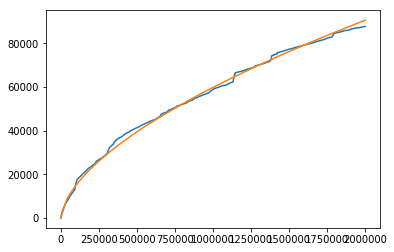

In [66]:
def getUniqueWordsNum(train, sz):
    texts = train.data.copy()
    uniqueWords = set()
    uniqueWordsNum = [0]*sz
    wordsNum = 0
    for i in range(len(texts)):
        if wordsNum < sz - 1:
            for word in texts[i].split():
                if wordsNum < sz - 1:
                    wordsNum += 1
                    uniqueWords.add(word)
                    uniqueWordsNum[wordsNum] = len(uniqueWords)
    return uniqueWordsNum
                    

sz = 2000000
uniqueWordsNum = getUniqueWordsNum(twenty_train, sz)
nums = range(sz)
plt.plot(nums, uniqueWordsNum)
x = np.linspace(0, sz)
y = 15*x**(0.6)
plt.plot(x, y)

### Как мы видим, оба закона выполнены